In [7]:
import requests
import tensorflow as tf
import numpy as np
import json
import matplotlib.pyplot as plt

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


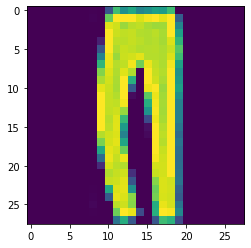

Image label: Trouser


In [9]:
# Grab an image from the test dataset.
image = test_images[2]


plt.imshow(image)
plt.show()
print("Image label: " + class_names[test_labels[2]])

In [10]:
print(image.shape)

# Add the image to a batch where it's the only member.
image = (np.expand_dims(image, 0))

print(image.shape)


(28, 28)
(1, 28, 28)


## Make prediction request

In [11]:
json_data = json.dumps(
    {
        "instances": image.tolist()
    }
)

endpoint = "http://localhost:8080/v1/models/fashion-mnist:predict"

response = requests.post(endpoint, data=json_data)
prediction = tf.argmax(response.json()["predictions"][0]).numpy()
print(class_names[prediction])

Trouser
